In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

<font color=green> Load Dataset </font>

In [2]:
df_train = pd.read_csv('data/noshow_train.csv')
df_test = pd.read_csv('data/noshow_test.csv')

<font color=green> Missing values </font>

In [3]:
#check missing values
df_train.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [4]:
#check missing values
df_test.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
dtype: int64

<font color=green> Handle non-number features </font>

In [5]:
feature_drops = ['Gender', 'ScheduledDay', 
                 'AppointmentDay', 'Neighbourhood', 
                 'PatientId']
df_train.drop(feature_drops, axis=1, inplace=True)
df_test.drop(feature_drops, axis=1, inplace=True)

<font color=green> Extract features from training </font>

In [6]:
X_train = df_train.drop(['No-show'], axis=1).values

<font color=green> Collect the training labels </font>

In [7]:
y_train = df_train['No-show'].values

<font color=green> Extract test features </font>

In [8]:
X_test = df_test.values

Scale features

In [9]:
from sklearn import preprocessing
std_scaler = preprocessing.StandardScaler()
std_scaler.fit(X_train)
X_train_std_sk = std_scaler.transform(X_train)
X_test_std_sk = std_scaler.transform(X_test)

<font color=red> Initialize and train model </font>

In [10]:
from sklearn.neighbors import KNeighborsClassifier
#n_neighbors = k value
mykNN = KNeighborsClassifier(n_neighbors=3, 
                             metric='euclidean')
mykNN.fit(X_train_std_sk, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

<font color=red> Predict test labels </font>

In [11]:
y_pred = mykNN.predict(X_test_std_sk)

<font color=red> EVALUATION </font>

<font color=red> 0. Load real labels </font>

In [12]:
y_real = pd.read_csv('data/noshow_test_labels.csv').values

<font color=red> 1. Accuracy </font>

In [13]:
from sklearn.metrics import accuracy_score

In [14]:
accuracy_score(y_real, y_pred)

0.74839611778253

<font color=red> 2. True/False Positive/Negative and ROC curve </font>

<font color=red>2a. Get y_score</font>

In [15]:
y_prob = mykNN.predict_proba(X_test_std_sk)
y_score = y_prob[:, 1]

In [23]:
y_score.shape

(36474,)

<font color=red> 2b. ROC curve</font>

In [16]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_real, y_score)

<font color=red> 2c. AUC Score </font>

In [17]:
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_real, y_score)
auc

0.5856952620265967

<font color=red> 2c. Draw ROC curve with AUC score</font>

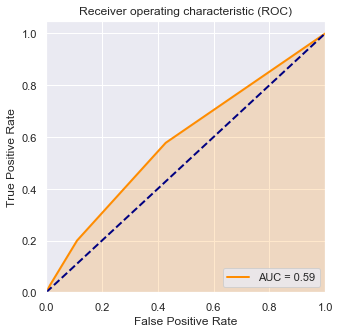

In [18]:
plt.figure(figsize=(5,5)) # set the figure size
sns.set() # activate seaborn style
plt.plot(fpr, tpr, color='darkorange',
         lw=2,
         label='AUC = {0:0.2f}'.format(auc)) 
plt.fill_between(fpr, tpr, alpha=0.2, color='darkorange')
# fill the area under roc curve, alpha: transparency rate
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
# plot.plot([x_1, x_2], [y_1, y_2])
# plot a diagonal line from [0,0] to [1, 1]
plt.xlim([0.0, 1.0]) # set limit of x-axis
plt.ylim([0.0, 1.05]) # set limite of y-axis
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

<font color=red> 3. Precision-Recall </font>

<font color=red> 3a. P-R Curve </font>

In [19]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(
    y_real, y_score)

<font color=red> 3b. AP Score <font>

In [20]:
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_real, y_score)
average_precision

0.2478126983886935

<font color=red> 3b. Draw P-R curve </font>

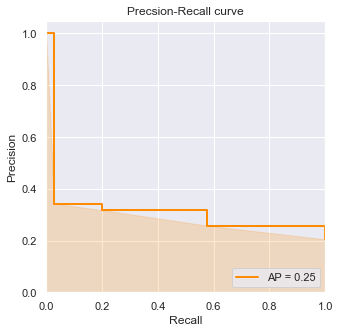

In [21]:
plt.figure(figsize=(5,5))
sns.set()
plt.step(recall, precision, color='darkorange',
         lw=2,
        label='AP = {0:0.2f}'.format(average_precision)
         )
plt.fill_between(recall, precision, alpha=0.2, color='darkorange')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precsion-Recall curve')
plt.legend(loc="lower right")
plt.show()

<font color=red> 3c. F1 score </font>

In [24]:
from sklearn.metrics import f1_score
f1_score(y_real, y_pred)  

0.24549864342678615